<a href="https://colab.research.google.com/github/Hgherzog/mlpractice/blob/main/SVDonjesterdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# load the data matrix X
d_jest = np.load('jesterdata.npz')
X = d_jest['X']
# load known ratings y and true ratings truey
d_new = np.load('newuser.npz')
y = d_new['y']
true_y = d_new['truey']
# total number of joke ratings should be m = 100, n = 7200
m, n = X.shape
# train on ratings we know for the new user
train_indices = np.squeeze(y != -99)
num_train = np.count_nonzero(train_indices)
# test on ratings we don't know
test_indices = np.logical_not(train_indices)
num_test = m - num_train
X_data = X[train_indices, 0:20]
y_data = y[train_indices]
y_test = true_y[test_indices]
# solve for weights
w=np.linalg.inv(X_data.T@X_data)@X_data.T@y_data
# compute predictions
y_hat_train=X_data@w
y_hat_test=X[test_indices, 0:20]@w
# measure performance on training jokes 
err=0
for i in range(25):
  err=np.linalg.norm(y_hat_train[i]-y_data[i]) + err
avgerr_train= err / 25
# display results
ax1 = plt.subplot(121)
sorted_indices = np.argsort(np.squeeze(y_data))
ax1.plot(
    range(num_train), y_data[sorted_indices], 'b.',
    range(num_train), y_hat_train[sorted_indices], 'r.'
)
ax1.set_title('prediction of known ratings (trained with 20 users)')
ax1.set_xlabel('jokes (sorted by true rating)')
ax1.set_ylabel('rating')
ax1.legend(['true rating', 'predicted rating'], loc='upper left')
ax1.axis([0, num_train, -15, 10])
print("Average l_2 error (train):", avgerr_train)
# measure performance on unrated jokes
err1=0
for i in range(75):
  err1=np.linalg.norm(y_hat_test[i]-y_test[i]) + err1
avgerr_test= err1 / 75
# display results
ax2 = plt.subplot(122)
sorted_indices = np.argsort(np.squeeze(y_test))
ax2.plot(
    range(num_test), y_test[sorted_indices], 'b.',
    range(num_test), y_hat_test[sorted_indices], 'r.'
)
ax2.set_title('prediction of unknown ratings (trained with 20 users)')
ax2.set_xlabel('jokes (sorted by true rating)')
ax2.set_ylabel('rating')
ax2.legend(['true rating', 'predicted rating'], loc='upper left')
ax2.axis([0, num_test, -15, 10])
print("Average l_2 (test):", avgerr_test)



FileNotFoundError: ignored

Average l_2 error (train): 9.103828801926284e-15
Average l_2 (test): 2.8390939780678344


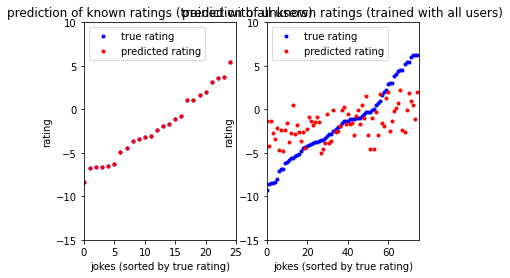

In [ ]:

# b)
test_indices = np.logical_not(train_indices)
num_test = m - num_train
X_data = X[train_indices, :]
y_data = y[train_indices]
y_test = true_y[test_indices]
# solve for weights
U, s, Vt=np.linalg.svd(X_data)
#make a 7175 x 25 matrix of 0s
z=np.zeros((7175,25))
Sig=np.concatenate((np.diagflat(s),z)).T
w1= Vt.T@np.linalg.pinv(Sig)@U.T@y_data
# compute predictions
y_hat_train=X_data@w1
y_hat_test=X[test_indices,:]@w1
# measure performance on training jokes 
err=0
for i in range(25):
  err=np.linalg.norm(y_hat_train[i]-y_data[i]) + err
avgerr_train= err / 25
# display results
ax1 = plt.subplot(121)
sorted_indices = np.argsort(np.squeeze(y_data))
ax1.plot(
    range(num_train), y_data[sorted_indices], 'b.',
    range(num_train), y_hat_train[sorted_indices], 'r.'
)
ax1.set_title('prediction of known ratings (trained with all users)')
ax1.set_xlabel('jokes (sorted by true rating)')
ax1.set_ylabel('rating')
ax1.legend(['true rating', 'predicted rating'], loc='upper left')
ax1.axis([0, num_train, -15, 10])
print("Average l_2 error (train):", avgerr_train)
# measure performance on unrated jokes
err1=0
i=0
for i in range(75):
  err1=np.linalg.norm(y_hat_test[i]-y_test[i]) + err1
avgerr_test= err1 / 75
# display results
ax2 = plt.subplot(122)
sorted_indices = np.argsort(np.squeeze(y_test))
ax2.plot(
    range(num_test), y_test[sorted_indices], 'b.',
    range(num_test), y_hat_test[sorted_indices], 'r.'
)
ax2.set_title('prediction of unknown ratings (trained with all users)')
ax2.set_xlabel('jokes (sorted by true rating)')
ax2.set_ylabel('rating')
ax2.legend(['true rating', 'predicted rating'], loc='upper left')
ax2.axis([0, num_test, -15, 10])
print("Average l_2 (test):", avgerr_test)


[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
Average l_2 error (train): 3.2707287815099613
Average l_2 (test): 3.5084182175025593


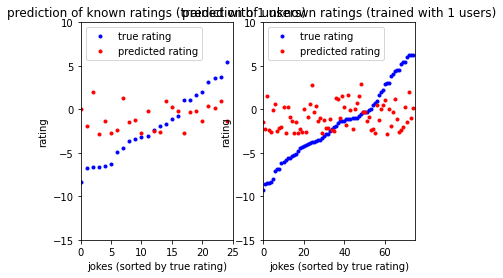

In [ ]:
#c want to find the users corresponding to the highest weight and predict solely off of that.

w1_s=np.sort(w1)
print(w1_s == w1)
#Now that we determined list is already sorted we can pick the largest weighted
#Just the most important user

X_data = X[train_indices, 0]
y_data = y[train_indices]
y_test = true_y[test_indices]
# solve for weights
w=(1/(X_data.T@X_data))*X_data.T@y_data
# compute predictions
y_hat_train=w*X_data
y_hat_test=w*X[test_indices, 0]
# measure performance on training jokes 
err=0
for i in range(25):
  err=np.linalg.norm(y_hat_train[i]-y_data[i]) + err
avgerr_train= err / 25
# display results
ax1 = plt.subplot(121)
sorted_indices = np.argsort(np.squeeze(y_data))
ax1.plot(
    range(num_train), y_data[sorted_indices], 'b.',
    range(num_train), y_hat_train[sorted_indices], 'r.'
)
ax1.set_title('prediction of known ratings (trained with 1 users)')
ax1.set_xlabel('jokes (sorted by true rating)')
ax1.set_ylabel('rating')
ax1.legend(['true rating', 'predicted rating'], loc='upper left')
ax1.axis([0, num_train, -15, 10])
print("Average l_2 error (train):", avgerr_train)
# measure performance on unrated jokes
err1=0
for i in range(75):
  err1=np.linalg.norm(y_hat_test[i]-y_test[i]) + err1
avgerr_test= err1 / 75
# display results
ax2 = plt.subplot(122)
sorted_indices = np.argsort(np.squeeze(y_test))
ax2.plot(
    range(num_test), y_test[sorted_indices], 'b.',
    range(num_test), y_hat_test[sorted_indices], 'r.'
)
ax2.set_title('prediction of unknown ratings (trained with 1 users)')
ax2.set_xlabel('jokes (sorted by true rating)')
ax2.set_ylabel('rating')
ax2.legend(['true rating', 'predicted rating'], loc='upper left')
ax2.axis([0, num_test, -15, 10])
print("Average l_2 (test):", avgerr_test)




Average l_2 error (train): 3.2002605783742
Average l_2 (test): 3.213269392850246


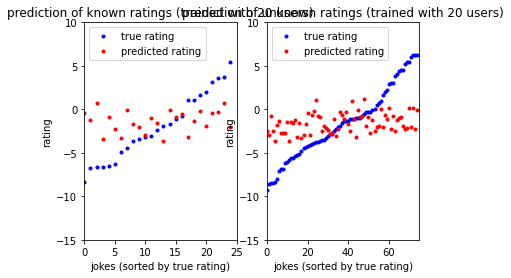

In [ ]:

#c) continued
X_data = X[train_indices, 0:2]
y_data = y[train_indices]
y_test = true_y[test_indices]
w=np.linalg.inv(X_data.T@X_data)@X_data.T@y_data
# compute predictions
y_hat_train=X_data@w
y_hat_test=X[test_indices, 0:2]@w
err=0
for i in range(25):
  err=np.linalg.norm(y_hat_train[i]-y_data[i]) + err
avgerr_train= err / 25
# display results
ax1 = plt.subplot(121)
sorted_indices = np.argsort(np.squeeze(y_data))
ax1.plot(
    range(num_train), y_data[sorted_indices], 'b.',
    range(num_train), y_hat_train[sorted_indices], 'r.'
)
ax1.set_title('prediction of known ratings (trained with 2 users)')
ax1.set_xlabel('jokes (sorted by true rating)')
ax1.set_ylabel('rating')
ax1.legend(['true rating', 'predicted rating'], loc='upper left')
ax1.axis([0, num_train, -15, 10])
print("Average l_2 error (train):", avgerr_train)
# measure performance on unrated jokes
err1=0
for i in range(75):
  err1=np.linalg.norm(y_hat_test[i]-y_test[i]) + err1
avgerr_test= err1 / 75
# display results
ax2 = plt.subplot(122)
sorted_indices = np.argsort(np.squeeze(y_test))
ax2.plot(
    range(num_test), y_test[sorted_indices], 'b.',
    range(num_test), y_hat_test[sorted_indices], 'r.'
)
ax2.set_title('prediction of unknown ratings (trained with 2 users)')
ax2.set_xlabel('jokes (sorted by true rating)')
ax2.set_ylabel('rating')
ax2.legend(['true rating', 'predicted rating'], loc='upper left')
ax2.axis([0, num_test, -15, 10])
print("Average l_2 (test):", avgerr_test)




In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
import plotly.express as px  
#1e
%matplotlib notebook
#Projecting columns onto first 3 left singular vectors
U, s, Vt=np.linalg.svd(X)
U_3=U[0:3]
Sig=np.concatenate((s[0:3],np.zeros(97)))
nSig=np.hstack((np.diag(Sig), np.zeros((100,7100))))

proj_col=U@nSig
a=proj_col[:,0]
b=proj_col[:,1]
c=proj_col[:,2]

#Projecting rows onto first 3 right singular vectors
proj_row=nSig@Vt
a1=proj_row[0,:]
b1=proj_row[1,:]
c1=proj_row[2,:]
#Now we want to graph
fig1 =px.scatter_3d(proj_col[:,0:2], a, b, c)
fig1.show()
fig2 =px.scatter_3d(proj_row[:,0:2], a1, b1, c1)
fig2.show()


In [ ]:
#1f

#define power iteration function
#power_method(matrix, num_sims)

def power_method(A, num_sims):
  b_k = np.random.rand(A.shape[1])
  for i in range(num_sims):
    b_k=(A@b_k) / np.linalg.norm(b_k)
  return b_k

#To find the first columns of U and V need to find the dominant eigenvectors of 
#A.TA for v1 and AAT for u1

v1=power_method(X.T@X, 100)
u1=power_method(X@X.T, 100)
print(u1, v1)

print(np.linalg.norm(U[:,0]-u1))
print(np.linalg.norm(Vt[0, :]-v1))
  


[ 4.91464520e+05  4.91270512e+05  5.00348716e+05  3.72441169e+05
  3.76234891e+05  7.13297430e+05  2.66815149e+05  1.26961685e+05
  4.43228048e+05  5.45487312e+05  6.84585782e+05  7.15757926e+05
  5.86500002e+04  7.10195796e+05  1.97280844e+02 -1.23605271e+05
  1.47772489e+05  2.03192789e+05  3.96060803e+05  3.00031471e+05
  7.34462543e+05  6.13567304e+05  5.22921661e+05  2.87095838e+05
  5.69899700e+05  6.77847070e+05  7.48076035e+05  6.94597026e+05
  6.89828872e+05  5.38951325e+05  7.09634919e+05  7.39034013e+05
  3.69568553e+05  6.16152799e+05  7.49477691e+05  7.06555866e+05
  2.88598526e+05  6.21175011e+05  6.57091570e+05  6.18258438e+05
  5.06510156e+05  7.12188443e+05  3.90263986e+05  1.35555870e+05
  6.35595034e+05  6.31938893e+05  7.08757073e+05  6.73449066e+05
  7.63309971e+05  7.54954272e+05  5.21517533e+05  5.79146379e+05
  7.32446727e+05  7.76153570e+05  5.18374198e+05  6.69207674e+05
  2.11018175e+05 -3.07402449e+04  4.84118499e+05  3.46714359e+05
  7.80102175e+05  7.74586

In [ ]:
#Problem 2
from IPython.lib.display import IFrame
import scipy.io as sio
import numpy as np
##### Part a #####
# load the training data X and the training labels y
data_file = np.load('face_emotion_data.npz')
X = data_file['X']
y = data_file['y']
print(X.shape)


#a) k-truncated SVD
#Assign test and train across all permutations
error_total=0
err_perc=0
for k in range(1,10):
  err_perc=0
  error_avg=0
  for i in range(8):
    for j in range(8):
      if i !=j:
        test_indices=np.concatenate((np.arange(16*i, 16*(i+1)), np.arange(16*j,16*(j+1))))
        X_Train=np.delete(X, test_indices, 0)
        y_train=np.delete(y, test_indices)
        X_Test=X[test_indices, :]
        y_test=y[test_indices]
        #calculate k-truncated weight vector
        U, s, Vt=np.linalg.svd(X_Train)
        Sig=np.concatenate((s[0:k],np.zeros(9-k)))
        nSig=np.vstack((np.diag(Sig), np.zeros((87,9))))
        w_k=Vt.T@np.linalg.pinv(nSig)@U.T@y_train
        for j in range(16):
          if np.sign(X_Test[j]@w_k) != y_test[j]:
            error_total = error_total + 1
        err_perc = (error_total / 16) + err_perc
        error_total= 0    
  error_avg = err_perc / 56 
  print(error_avg)








(128, 9)
0.25111607142857145
0.21316964285714285
0.23660714285714285
0.08482142857142858
0.05022321428571429
0.04352678571428571
0.044642857142857144
0.04575892857142857
0.04575892857142857


In [ ]:
from numpy.core.numeric import ones
#problem 2b


# RLS parameters to test
lambda_vals = np.array ([0, 0.5, 1, 2, 4, 8, 16])
param_err_RLS = np.zeros(len(lambda_vals))

for k in range(len(lambda_vals)):
  err_perc=0
  error_avg=0
  for i in range(8):
    for j in range(8):
      if i !=j:
        test_indices=np.concatenate((np.arange(16*i, 16*(i+1)), np.arange(16*j,16*(j+1))))
        X_Train=np.delete(X, test_indices, 0)
        y_train=np.delete(y, test_indices)
        X_Test=X[test_indices, :]
        y_test=y[test_indices]
        #calculate ridge regression using SVD
        U, s, Vt=np.linalg.svd(X_Train)
        rSig=s*(np.true_divide(np.ones(len(s)),(s*s + lambda_vals[k]*np.ones(len(s)))))
        rinvSig=np.vstack((np.diag(rSig), np.zeros((87,9)))).T
        w_r=Vt.T@rinvSig@U.T@y_train
        for j in range(16):
          if np.sign(X_Test[j]@w_r) != y_test[j]:
            error_total = error_total + 1
        err_perc = (error_total / 16) + err_perc
        error_total= 0    
  error_avg = err_perc / 56
  param_err_RLS[k]=error_avg
  error_avg=0 
print(param_err_RLS)


[0.04575893 0.04352679 0.04352679 0.04575893 0.04910714 0.05133929
 0.05357143]


In [ ]:
#2c

rand_w=np.random.rand(9,3)
#Augment X with 3 new columns
X_a=np.hstack((X, X@rand_w))

#Now redo a)
error_total=0
err_perc=0
for k in range(1,10):
  err_perc=0
  error_avg=0
  for i in range(8):
    for j in range(8):
      if i !=j:
        test_indices=np.concatenate((np.arange(16*i, 16*(i+1)), np.arange(16*j,16*(j+1))))
        X_Train=np.delete(X_a, test_indices, 0)
        y_train=np.delete(y, test_indices)
        X_Test=X_a[test_indices, :]
        y_test=y[test_indices]
        #calculate k-truncated weight vector
        U, s, Vt=np.linalg.svd(X_Train)
        Sig=np.concatenate((s[0:k],np.zeros(12-k)))
        nSig=np.vstack((np.diag(Sig), np.zeros((84,12))))
        w_k=Vt.T@np.linalg.pinv(nSig)@U.T@y_train
        for j in range(16):
          if np.sign(X_Test[j]@w_k) != y_test[j]:
            error_total = error_total + 1
        err_perc = (error_total / 16) + err_perc
        error_total= 0    
  error_avg = err_perc / 56 
  print(error_avg)

  #b) Ridge Regression w 12 features
  for k in range(len(lambda_vals)):
    err_perc=0
    error_avg=0
    for i in range(8):
      for j in range(8):
        if i !=j:
          test_indices=np.concatenate((np.arange(16*i, 16*(i+1)), np.arange(16*j,16*(j+1))))
          X_Train=np.delete(X_a, test_indices, 0)
          y_train=np.delete(y, test_indices)
          X_Test=X_a[test_indices, :]
          y_test=y[test_indices]
          #calculate ridge regression using SVD
          U, s, Vt=np.linalg.svd(X_Train)
          rSig=s*(np.true_divide(np.ones(len(s)),(s*s + lambda_vals[k]*np.ones(len(s)))))
          rinvSig=np.vstack((np.diag(rSig), np.zeros((84,12)))).T
          w_r=Vt.T@rinvSig@U.T@y_train
          for j in range(16):
            if np.sign(X_Test[j]@w_r) != y_test[j]:
              error_total = error_total + 1
          err_perc = (error_total / 16) + err_perc
          error_total= 0    
    error_avg = err_perc / 56
    param_err_RLS[k]=error_avg
    error_avg=0 
best_lambda=np.argmin(param_err_RLS)
print(param_err_RLS[best_lambda])
print(lambda_vals[best_lambda])

0.04241071428571429
2.0


[[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1]]
[[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1

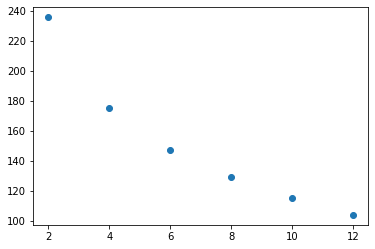

In [ ]:
#Problem 3
from IPython.lib.display import IFrame
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
import plotly.express as px 
# load the training data 
data_file = np.load('mnist.npz')
train_data = data_file['train_data']
test_data = data_file['test_data']
y_train=data_file['train_target']
y_test=data_file['test_target']
print(y_train)
print(y_test)

for i in range(len(train_data)):
  train_data[i]=(train_data[i]-np.mean(train_data[i])) / np.std(train_data[i])

for i in range(len(test_data)):
  test_data[i]=(test_data[i]-np.mean(train_data[i])) / np.std(test_data[i])

#3a assume just want to do this with training data
U,s,Vt=np.linalg.svd(train_data, full_matrices=False)
#Function calulates the reconstruction error between each row of X and the truncated SVD
def recon_err(X, U,s,Vt, k):
  Sig_k=np.concatenate((s[0:k],np.zeros(len(s)-k)))
  nSig_k=np.diag(Sig_k)
  rec_X=U@nSig_k@Vt
  err_sum=0
  for i in range(len(rec_X)):
    xi=X[i,:]
    x_ri=rec_X[i,:]
    err_sum=err_sum + np.linalg.norm(xi-x_ri)**2
  err= err_sum / len(rec_X)
  return err


r_val=np.arange(2, 14, 2)
arr_err=np.zeros(len(r_val))
for i in range(len(r_val)):
  arr_err[i]=recon_err(train_data, U,s, Vt, r_val[i])
plt.scatter(r_val, arr_err)

31.641135466830413
42.532752095637974


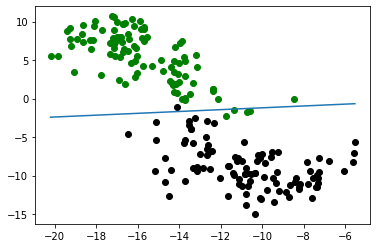

In [ ]:
#b) Plot 2d truncation of training data and mark by number class
U,s,Vt=np.linalg.svd(train_data, full_matrices=False)
Sig_2=np.concatenate((s[0:2],np.zeros(len(s)-2)))
nSig_2=np.diag(Sig_2)
X_2d=U@nSig_2
y=y_train.reshape((200,1))

for i in range(len(y)):
  if y[i,0] == 1:
    plt.scatter(X_2d[i,0], X_2d[i,1], color='green', label='1')
  else:
   plt.scatter(X_2d[i,0], X_2d[i,1], color='black', label='-1')


#c Find a weight for the 2d representation
X_2d=X_2d[:,0:2]
w_2d=np.linalg.inv(X_2d.T@X_2d)@X_2d.T@y


#Training loss

train_loss=np.linalg.norm(y-X_2d@w_2d)**2
print(train_loss)
#Test Loss
U, s, Vt=np.linalg.svd(test_data)
Sig_2=np.concatenate((s[0:2],np.zeros(len(s)-2)))
nSig_2=np.diag(Sig_2)
test2d=U@nSig_2
test2d=test2d[:,0:2]
y_test=y_test.reshape((200,1))
y_test_hat=test2d@w_2d
#print(y_test)

test_loss=np.linalg.norm(y_test-y_test_hat)**2
print(test_loss)

#d Plot decision boundary (assumin on the test data not the training data)
slope=-1*w_2d[0] /w_2d[1]
x_vals=np.linspace(np.min(X_2d[:, 0]), np.max(X_2d[:, 0]))


plt.plot(x_vals, slope*x_vals, label='decision boundary')





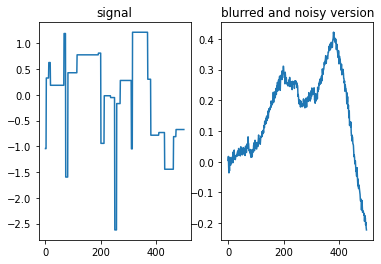

[354.508708751929, 308.0847303483287, 273.5036665499557, 257.67874910993646, 163.06379079328005, 156.14774768399553, 147.8775213555509, 146.38928550252956, 131.7213302522598, 131.29797309490235, 131.09367992241127, 128.5762760054307, 128.57451584322322, 128.40878691787142, 124.21138378330043, 124.30114562366407, 122.66624456815295, 122.11412931479985, 118.82445819696497, 102.56897742839824, 98.52730398640576, 93.01924200513392, 93.21892324266425, 92.94322035972708]
24
0.5


In [ ]:
#Problem 4
import numpy as np
import matplotlib.pyplot as plt
## deblurring
n = 500
k = 300
sigma = 0.01
# generate random piecewise constant signal
w = np.zeros((n, 1))
w[0] = np.random.standard_normal()
for i in range(1, n):
    if np.random.rand(1) < 0.95:
        w[i] = w[i-1]
    else:
        w[i] = np.random.standard_normal()
# generate k-point averaging function
h = np.ones(k) / k
# make a matrix for blurring
m = n + k - 1
X = np.zeros((m, m))
for i in range(m):
    if i < k:
        X[i, :i+1] = h[:i+1]
    else:
        X[i, i - k: i] = h
X = X[:, 0:n]
# blurred signal + noise
y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))

# plot
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('signal')
ax1.plot(w)
ax2.set_title('blurred and noisy version')
ax2.plot(y[0:n])
plt.show()

#Least squares solution
w_ls=np.linalg.inv(X.T@X)@X.T@y

err_ls=np.linalg.norm(w_ls-w)**2

#Truncated Least Squares Solution optimized for performance
U,s, Vt=np.linalg.svd(X)
k_range=np.arange(1,25)
k_loss=[]
w_out=[]
for k in k_range:
  Sig=np.concatenate((s[0:k], np.zeros(500 - k)))
  nSig=np.vstack((np.diag(Sig), np.zeros((799-len(s), 500))))
  w_k=Vt.T@np.linalg.pinv(nSig)@U.T@y
  w_out.append(w_k)
  loss=np.linalg.norm(w-w_k)**2
  k_loss.append(loss)
opt_k=np.argmin(k_loss)
#print loss array optimal k and corresponding weight
print(k_loss)
print(opt_k + 1)
#print(w_out[k-2])

#Ridge Regression LS calculation
lambda_vals=np.array ([0,0.5, 1, 2, 4, 8, 16, 32])
U, s, Vt=np.linalg.svd(X)
k=0
w_r_out=[]
r_loss=[]
for k in range(len(lambda_vals)):
  rSig=s*(np.true_divide(np.ones(len(s)),(s*s + lambda_vals[k]*np.ones(len(s)))))
  rinvSig=np.vstack((np.diag(rSig), np.zeros((799-len(s),500)))).T
  w_r=Vt.T@rinvSig@U.T@y
  w_r_out.append(w_r)
  loss=np.linalg.norm(w-w_r)**2
  r_loss.append(loss)
#calculate best lambda from set of lambda values
best_lambda=np.argmin(r_loss)
print(lambda_vals[best_lambda])
#print(w_r_out[best_lambda])


